#**Analisis Visualisasi Berdasarkan Pola Kunjungan Terhadap Waktu dan Lokasi Di Kota New York Dan Kota Tokyo**

<pre>
Visualisasi Data dan Informasi RA
Kelompok 1
Ketua Kelompok  : Eksanty F Sugma Islamiaty - 122450001
Anggota Kelompok:
1.   Muhammad Bayu Syuhada - 122450007
2.   Nadia Fitri Yani - 121450101
</pre>

## Import Dataset

In [ ]:
import numpy as np
import pandas as pd
df1=pd.read_csv('/content/dataset_TSMC2014_NYC.csv',na_values=['#name?'])
print(df1.head(5))
df2=pd.read_csv('/content/dataset_TSMC2014_TKY.csv',na_values=['#name?'])
print(df2.head(5))

   userId                   venueId           venueCategoryId  \
0     470  49bbd6c0f964a520f4531fe3  4bf58dd8d48988d127951735   
1     979  4a43c0aef964a520c6a61fe3  4bf58dd8d48988d1df941735   
2      69  4c5cc7b485a1e21e00d35711  4bf58dd8d48988d103941735   
3     395  4bc7086715a7ef3bef9878da  4bf58dd8d48988d104941735   
4      87  4cf2c5321d18a143951b5cec  4bf58dd8d48988d1cb941735   

         venueCategory   latitude  longitude  timezoneOffset  \
0  Arts & Crafts Store  40.719810 -74.002581          -240.0   
1               Bridge  40.606800 -74.044170          -240.0   
2       Home (private)  40.716162 -73.883070          -240.0   
3       Medical Center  40.745164 -73.982519          -240.0   
4           Food Truck  40.740104 -73.989658          -240.0   

                     utcTimestamp  
0  Tue Apr 03 18:00:09 +0000 2012  
1  Tue Apr 03 18:00:25 +0000 2012  
2  Tue Apr 03 18:02:24 +0000 2012  
3  Tue Apr 03 18:02:41 +0000 2012  
4  Tue Apr 03 18:03:00 +0000 2012  
   userI

In [ ]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227428 entries, 0 to 227427
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           227428 non-null  int64  
 1   venueId          227428 non-null  object 
 2   venueCategoryId  227428 non-null  object 
 3   venueCategory    227428 non-null  object 
 4   latitude         227428 non-null  float64
 5   longitude        227428 non-null  float64
 6   timezoneOffset   227428 non-null  int64  
 7   utcTimestamp     227428 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573703 entries, 0 to 573702
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           573703 non-null  int64  
 1   venueId          573703 non-null  object 
 2   venueCategoryId  573703 non-null  object 
 3   venueCa

## Data Prepocessing

In [ ]:
df1.isnull().sum()

,0
userId,0
venueId,0
venueCategoryId,0
venueCategory,0
latitude,0
longitude,0
timezoneOffset,0
utcTimestamp,0


In [ ]:
df2.isnull().sum()

,0
userId,0
venueId,0
venueCategoryId,0
venueCategory,0
latitude,0
longitude,0
timezoneOffset,0
utcTimestamp,0


In [ ]:
df1[df1.duplicated()]

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
37,525,4f5684de771657f331e5ca01,4bf58dd8d48988d103941735,Home (private),40.963241,-74.094631,-240.0,Tue Apr 03 18:19:07 +0000 2012
186,184,4a06f10df964a5200c731fe3,4bf58dd8d48988d146941735,Deli / Bodega,40.720989,-73.981049,-240.0,Tue Apr 03 20:05:56 +0000 2012
670,74,4e63bfa345ddda352a235a77,4bf58dd8d48988d103941735,Home (private),40.772557,-74.141613,-240.0,Tue Apr 03 23:50:48 +0000 2012
954,105,4afb4334f964a520791c22e3,4bf58dd8d48988d1a2941735,Community College,40.951057,-74.089866,-240.0,Wed Apr 04 02:11:53 +0000 2012
1010,632,4d9e06cb7958f04dbac323fa,4bf58dd8d48988d1b2941735,College Academic Building,40.809182,-73.961730,-240.0,Wed Apr 04 03:00:08 +0000 2012
...,...,...,...,...,...,...,...,...
64463,715,4abd57e4f964a520d38920e3,4bf58dd8d48988d1cc941735,Steakhouse,40.648183,-73.791647,-240.0,Sun May 13 12:20:36 +0000 2012
64480,735,4c33c61c213c2d7f9088375d,4bf58dd8d48988d1e5941735,Other Great Outdoors,40.626383,-74.092626,-240.0,Sun May 13 12:35:25 +0000 2012
64715,950,4cb6fb253ac93704d9c4d70a,4bf58dd8d48988d113951735,Gas Station / Garage,40.790212,-74.051781,-240.0,Sun May 13 15:41:04 +0000 2012
65071,267,4faf2643e4b0604808298cc7,4bf58dd8d48988d1f1931735,General Entertainment,40.737523,-73.985273,-240.0,Sun May 13 18:41:06 +0000 2012


In [ ]:
df2[df2.duplicated()]

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
146,1790,4c0f80b67189c928f11bdab6,4bf58dd8d48988d12a951735,Train Station,35.654550,139.756742,540,Tue Apr 03 22:27:25 +0000 2012
629,701,4f387173e4b0ea2d7efc515f,4bf58dd8d48988d124941735,Office,35.656372,139.699338,540,Wed Apr 04 00:02:51 +0000 2012
897,928,4b6644f7f964a520811b2be3,4bf58dd8d48988d114951735,Bookstore,35.553344,139.646916,540,Wed Apr 04 01:52:32 +0000 2012
911,454,4c71f0a9376da093d156a5c6,4bf58dd8d48988d12c941735,Government Building,35.706814,139.694425,540,Wed Apr 04 01:59:26 +0000 2012
1036,1540,4b5fd552f964a52041ce29e3,4bf58dd8d48988d16d941735,Café,35.692725,139.703672,540,Wed Apr 04 02:52:11 +0000 2012
...,...,...,...,...,...,...,...,...
562351,188,50f3aa3ee4b02fd618fc3c34,4bf58dd8d48988d129951735,Train Station,35.682004,139.703141,540,Fri Feb 08 07:10:16 +0000 2013
567721,778,4e3bfc297d8b0e96105516e7,4bf58dd8d48988d124941735,Office,35.679295,139.779923,540,Tue Feb 12 09:30:33 +0000 2013
568220,1197,4b3eab45f964a52095a025e3,4bf58dd8d48988d129951735,Train Station,35.702706,139.560830,540,Tue Feb 12 11:18:44 +0000 2013
569661,1367,4b91e099f964a52021dd33e3,4bf58dd8d48988d165941735,Scenic Lookout,35.660286,139.729110,540,Wed Feb 13 06:52:25 +0000 2013


In [ ]:
df1.drop_duplicates()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240.0,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240.0,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240.0,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240.0,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240.0,Tue Apr 03 18:03:00 +0000 2012
...,...,...,...,...,...,...,...,...
32573,136,4ec74cd56da1d1092e654c60,4bf58dd8d48988d103941735,Home (private),40.760871,-73.988880,-240.0,Mon Apr 23 17:08:47 +0000 2012
32574,19,4ab2cd94f964a520756c20e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.749890,-74.036050,-240.0,Mon Apr 23 17:08:53 +0000 2012
32575,276,4a5e4f41f964a52059be1fe3,4bf58dd8d48988d163941735,Park,40.775854,-73.975255,-240.0,Mon Apr 23 17:08:55 +0000 2012
32576,536,4abcf59cf964a520d48720e3,4bf58dd8d48988d1c5941735,Sandwich Place,40.755541,-73.971009,-240.0,Mon Apr 23 17:09:14 +0000 2012


In [ ]:
df2.drop_duplicates()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012
...,...,...,...,...,...,...,...,...
32976,1889,4b132e42f964a520339523e3,4bf58dd8d48988d129951735,Train Station,35.667613,139.631837,540,Sun Apr 15 13:31:58 +0000 2012
32977,1708,4b9db2edf964a520d5ba36e3,4bf58dd8d48988d147941735,Diner,35.708917,139.673148,540,Sun Apr 15 13:32:01 +0000 2012
32978,1254,4b7fb4f1f964a520ed3930e3,4bf58dd8d48988d111941735,Japanese Restaurant,35.710925,139.775453,540,Sun Apr 15 13:32:02 +0000 2012
32979,462,4b2ae079f964a52061b124e3,4bf58dd8d48988d129951735,Train Station,35.651889,139.544396,540,Sun Apr 15 13:32:54 +0000 2012


## Pengambilan sampel

In [ ]:
# Reducing data sample size for quick visual preview
nyc_sample = df1.sample(150000, random_state=42)
tky_sample = df2.sample(150000, random_state=42)

## Visualisasi 1: lokasi yang sering dikunjungi

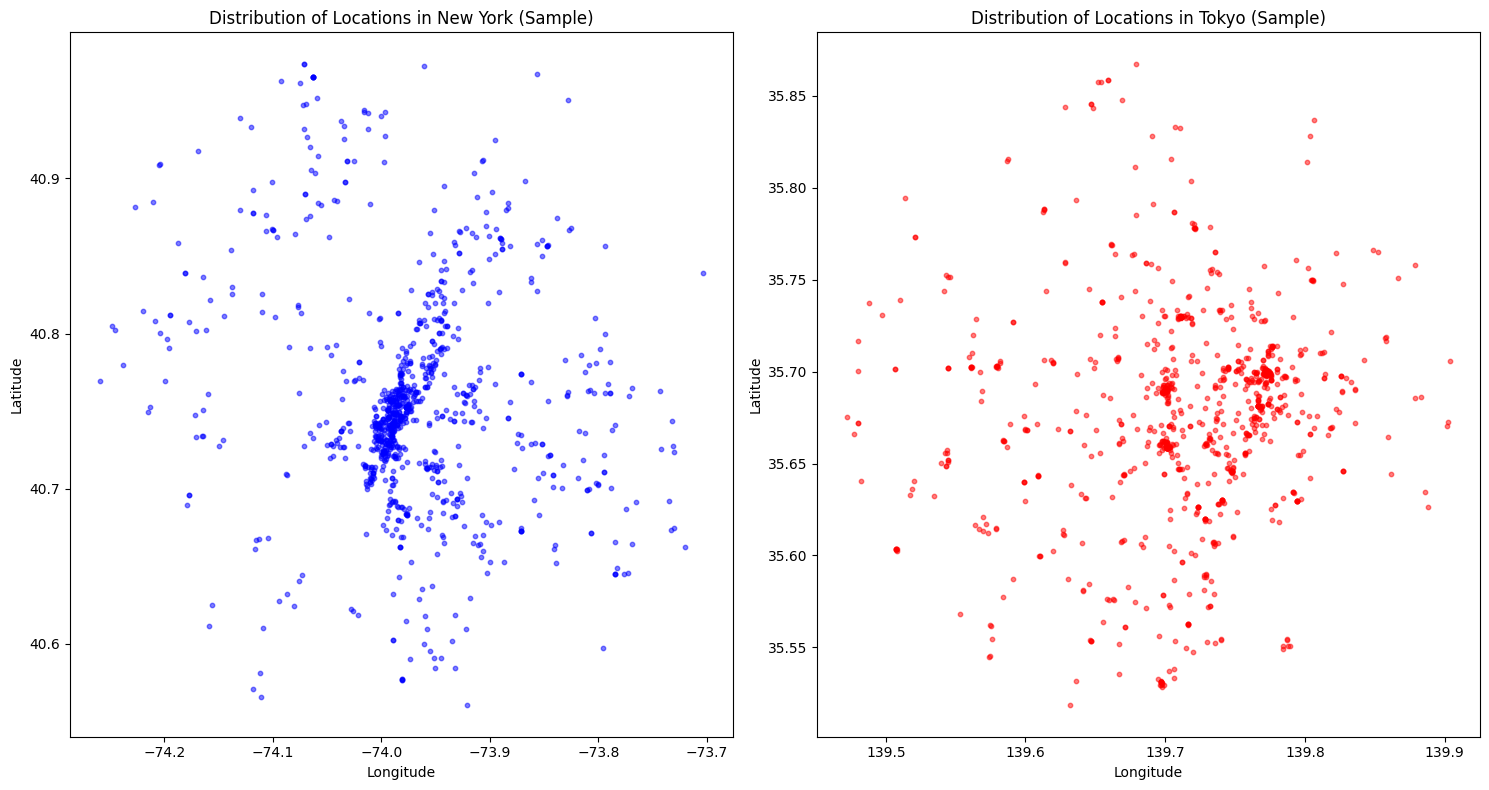

In [ ]:
# Reducing data sample size for quick visual preview
nyc_samplee = df1.sample(1000, random_state=42)  # Sample 1000 data points for NYC
tky_samplee = df2.sample(1000, random_state=42)  # Sample 1000 data points for Tokyo

# 1. Peta Sebaran Lokasi untuk NYC dan Tokyo (dengan sample data)
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot NYC sample data
ax[0].scatter(nyc_samplee['longitude'], nyc_samplee['latitude'], alpha=0.5, s=10, color='blue')
ax[0].set_title("Distribution of Locations in New York (Sample)")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

# Plot Tokyo sample data
ax[1].scatter(tky_samplee['longitude'], tky_samplee['latitude'], alpha=0.5, s=10, color='red')
ax[1].set_title("Distribution of Locations in Tokyo (Sample)")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

plt.tight_layout()
plt.show()


In [ ]:
nyc_data=df1

In [ ]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 101.0 MB/s eta 0:00:00


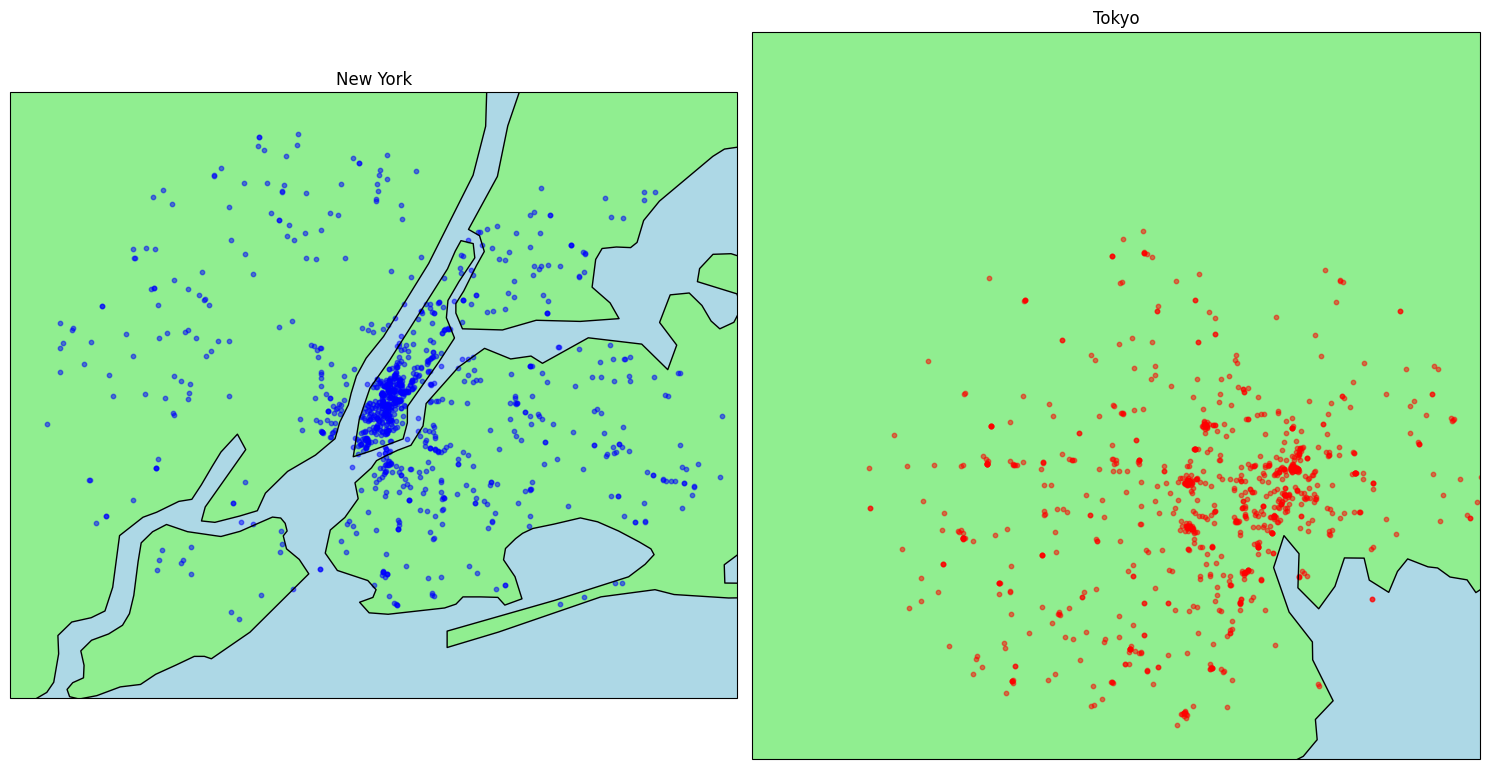

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

nyc_samplee = df1.sample(1000, random_state=42)  # Sample 1000 data points for NYC
tky_samplee = df2.sample(1000, random_state=42)  # Sample 1000 data points for Tokyo

fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ax[0].set_extent([-74.3, -73.7, 40.5, 41.0], crs=ccrs.PlateCarree())
ax[0].add_feature(cfeature.LAND, facecolor='lightgreen')
ax[0].add_feature(cfeature.OCEAN, facecolor='lightblue')
ax[0].add_feature(cfeature.COASTLINE)
ax[0].add_feature(cfeature.BORDERS, linestyle=':')
ax[0].scatter(nyc_samplee['longitude'], nyc_samplee['latitude'], alpha=0.5, s=10, color='blue', label="NYC Locations")
ax[0].set_title("New York")

ax[1].set_extent([139.4, 139.9, 35.5, 36.0], crs=ccrs.PlateCarree())
ax[1].add_feature(cfeature.LAND, facecolor='lightgreen')
ax[1].add_feature(cfeature.OCEAN, facecolor='lightblue')
ax[1].add_feature(cfeature.COASTLINE)
ax[1].add_feature(cfeature.BORDERS, linestyle=':')
ax[1].scatter(tky_samplee['longitude'], tky_samplee['latitude'], alpha=0.5, s=10, color='red', label="Tokyo Locations")
ax[1].set_title("Tokyo")

plt.tight_layout()
plt.show()


## Visualisasi 2: tempat yang sering dikunjungi

<ipython-input-11-35e3862db73d>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_data['utcTimestamp'] = pd.to_datetime(nyc_data['utcTimestamp'], errors='coerce')
<ipython-input-11-35e3862db73d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_venue_categories.index, x=top_venue_categories.values, palette="viridis")


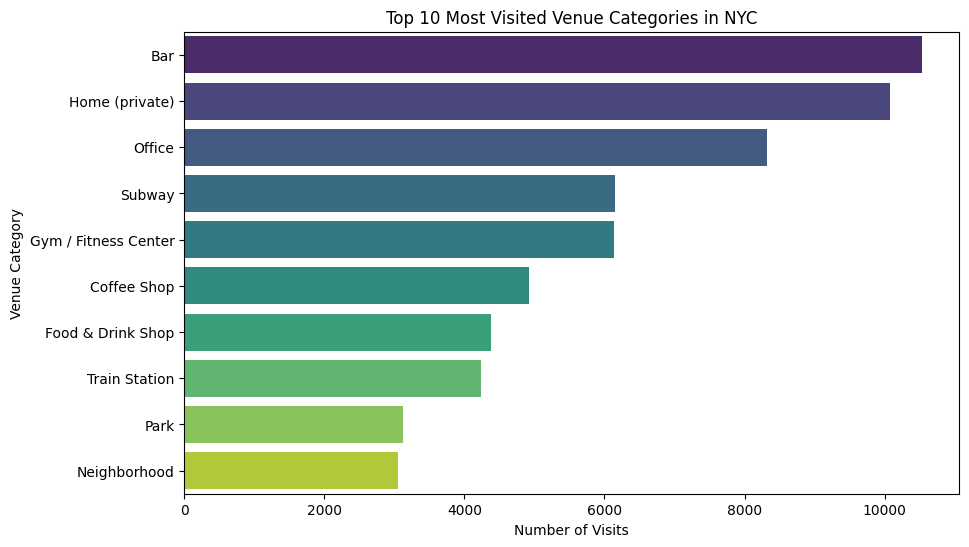

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns
import pandas as pd

nyc_data = nyc_sample

# Convert 'utcTimestamp' column to datetime objects using pd.to_datetime
nyc_data['utcTimestamp'] = pd.to_datetime(nyc_data['utcTimestamp'], errors='coerce')

# Extract day of the week and hour
nyc_data['day_of_week'] = nyc_data['utcTimestamp'].dt.day_name()
nyc_data['hour'] = nyc_data['utcTimestamp'].dt.hour

# Visualize top 10 most visited venue categories
top_venue_categories = nyc_data['venueCategory'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_venue_categories.index, x=top_venue_categories.values, palette="viridis")
plt.title("Top 10 Most Visited Venue Categories in NYC")
plt.xlabel("Number of Visits")
plt.ylabel("Venue Category")
plt.show()


<ipython-input-13-dacdc24785c2>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tky_data['utcTimestamp'] = pd.to_datetime(tky_data['utcTimestamp'], errors='coerce')
<ipython-input-13-dacdc24785c2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_venue_categories.index, x=top_venue_categories.values, palette="viridis")


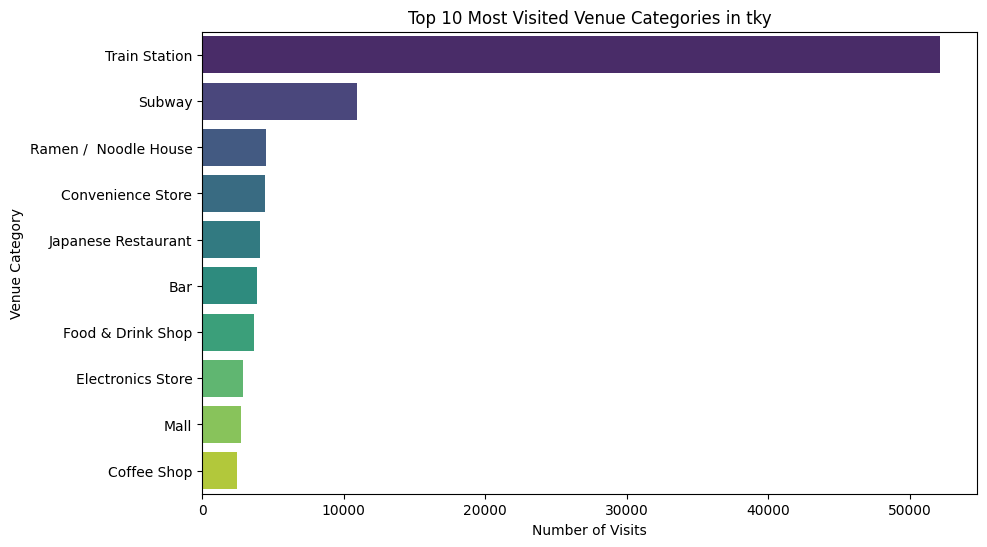

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns
import pandas as pd

tky_data = tky_sample

# Convert 'utcTimestamp' column to datetime objects using pd.to_datetime
tky_data['utcTimestamp'] = pd.to_datetime(tky_data['utcTimestamp'], errors='coerce')

# Extract day of the week and hour
tky_data['day_of_week'] = tky_data['utcTimestamp'].dt.day_name()
tky_data['hour'] = tky_data['utcTimestamp'].dt.hour

# Visualize top 10 most visited venue categories
top_venue_categories = tky_data['venueCategory'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_venue_categories.index, x=top_venue_categories.values, palette="viridis")
plt.title("Top 10 Most Visited Venue Categories in tky")
plt.xlabel("Number of Visits")
plt.ylabel("Venue Category")
plt.show()


## Visualisasi 3: Pengaruh antara perbedaan zona waktu dengan waktu kunjungan

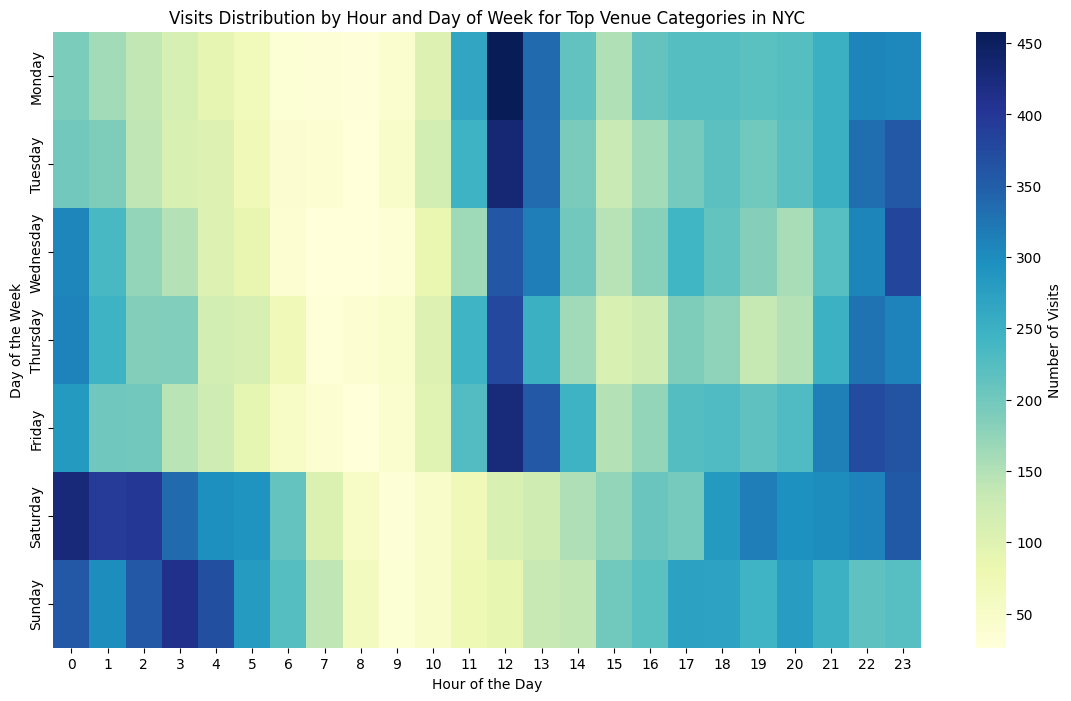

In [ ]:
# Filter data for top venue categories only
top_venue_data = nyc_data[nyc_data['venueCategory'].isin(top_venue_categories.index)]

# Create a pivot table to count visits by day of week and hour for each top venue category
venue_heatmap_data = top_venue_data.pivot_table(
    index='day_of_week', columns='hour', values='venueCategory', aggfunc='count'
).fillna(0)

# Reorder days of the week for better visual alignment
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
venue_heatmap_data = venue_heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(venue_heatmap_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Number of Visits'})
plt.title("Visits Distribution by Hour and Day of Week for Top Venue Categories in NYC")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


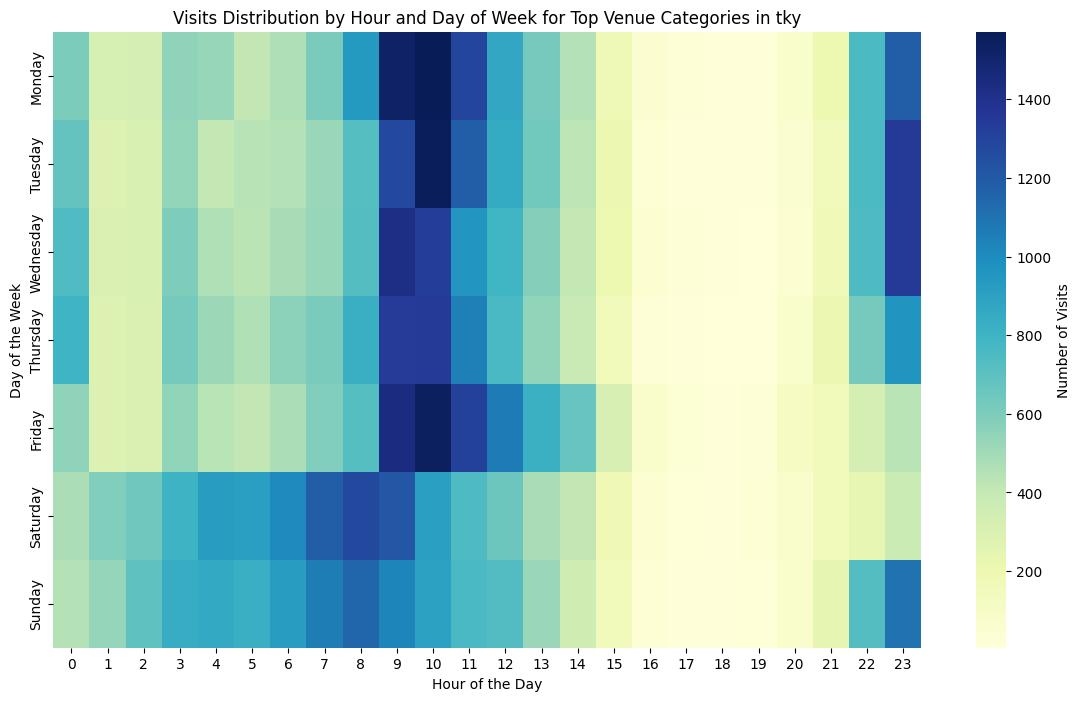

In [ ]:
# Filter data for top venue categories only
top_venue_data = tky_data[tky_data['venueCategory'].isin(top_venue_categories.index)]

# Create a pivot table to count visits by day of week and hour for each top venue category
venue_heatmap_data = top_venue_data.pivot_table(
    index='day_of_week', columns='hour', values='venueCategory', aggfunc='count'
).fillna(0)

# Reorder days of the week for better visual alignment
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
venue_heatmap_data = venue_heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(venue_heatmap_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Number of Visits'})
plt.title("Visits Distribution by Hour and Day of Week for Top Venue Categories in tky")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


## Visualisasi 4: Pengaruh waktu terhadap pola kunjungan di kedua kota

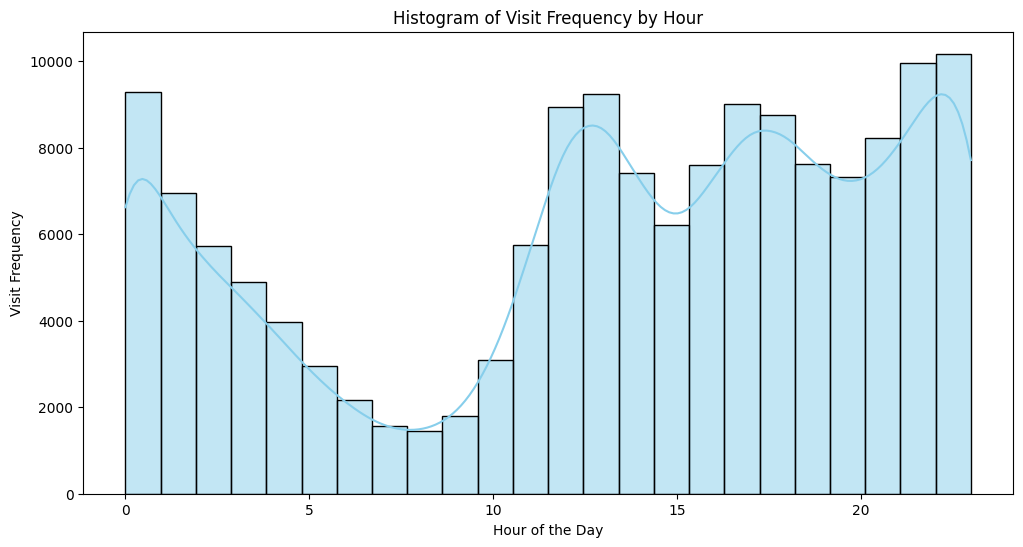

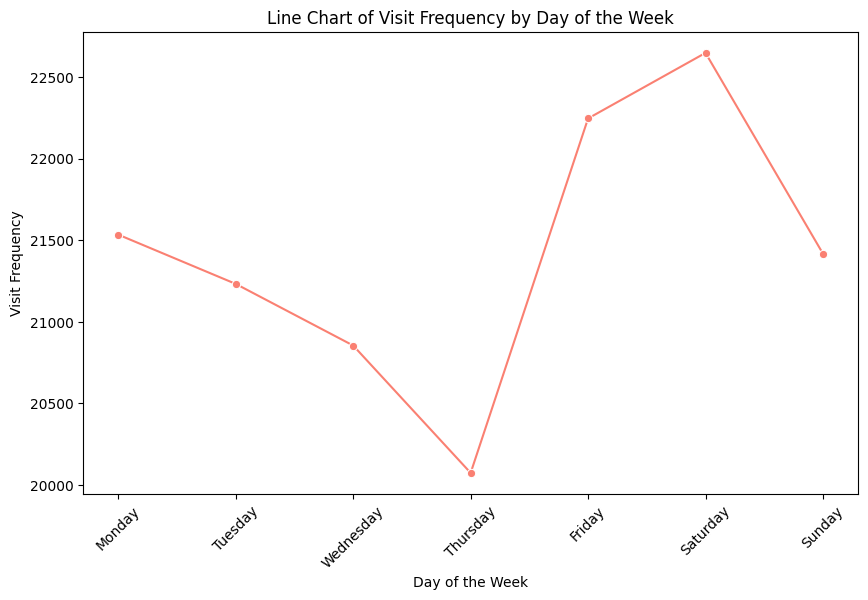

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data =nyc_sample

# Pastikan kolom 'utcTimestamp' sudah ada dan dapat dikonversi
if 'utcTimestamp' in data.columns:
    # Ubah kolom waktu ke format datetime
    data['utcTimestamp'] = pd.to_datetime(data['utcTimestamp'], errors='coerce')

    # Ambil hari dan jam dari kolom waktu
    data['day_of_week'] = data['utcTimestamp'].dt.day_name()
    data['hour'] = data['utcTimestamp'].dt.hour

    # Urutkan hari dalam minggu
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=days_order, ordered=True)

    # Histogram berdasarkan jam
    plt.figure(figsize=(12, 6))
    sns.histplot(data['hour'], bins=24, kde=True, color="skyblue")
    plt.title("Histogram of Visit Frequency by Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Visit Frequency")
    plt.show()

    # Line chart berdasarkan hari
    visit_by_day = data['day_of_week'].value_counts().reindex(days_order)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=visit_by_day.index, y=visit_by_day.values, marker='o', color="salmon")
    plt.title("Line Chart of Visit Frequency by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Visit Frequency")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'utcTimestamp' tidak ditemukan dalam data.")


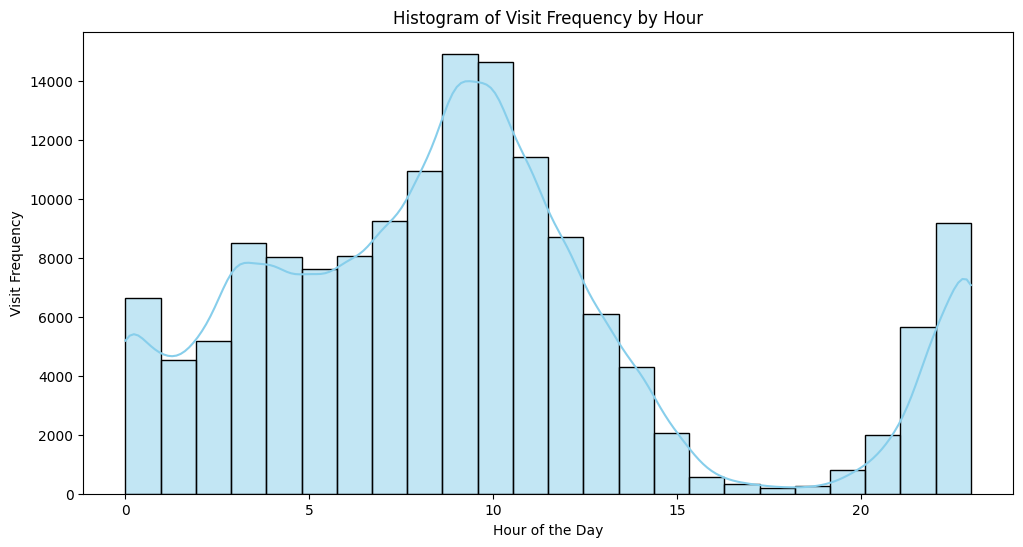

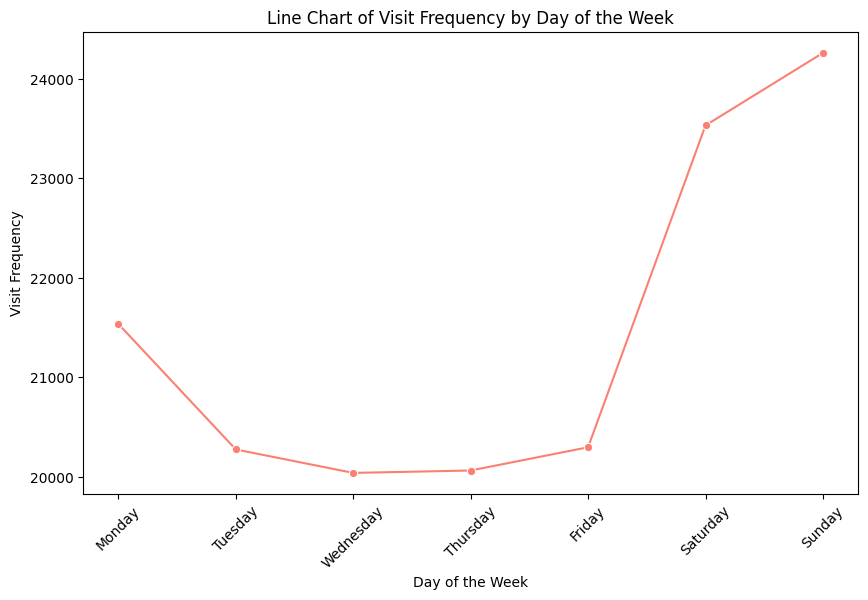

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data =tky_sample

# Pastikan kolom 'utcTimestamp' sudah ada dan dapat dikonversi
if 'utcTimestamp' in data.columns:
    # Ubah kolom waktu ke format datetime
    data['utcTimestamp'] = pd.to_datetime(data['utcTimestamp'], errors='coerce')

    # Ambil hari dan jam dari kolom waktu
    data['day_of_week'] = data['utcTimestamp'].dt.day_name()
    data['hour'] = data['utcTimestamp'].dt.hour

    # Urutkan hari dalam minggu
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=days_order, ordered=True)

    # Histogram berdasarkan jam
    plt.figure(figsize=(12, 6))
    sns.histplot(data['hour'], bins=24, kde=True, color="skyblue")
    plt.title("Histogram of Visit Frequency by Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Visit Frequency")
    plt.show()

    # Line chart berdasarkan hari
    visit_by_day = data['day_of_week'].value_counts().reindex(days_order)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=visit_by_day.index, y=visit_by_day.values, marker='o', color="salmon")
    plt.title("Line Chart of Visit Frequency by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Visit Frequency")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'utcTimestamp' tidak ditemukan dalam data.")


## Membuat visualisasi dapat diakses melalui streamlit

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.142.182.245


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.182.245:8501

⠸⠼⠴your url is: https://vast-gifts-suffer.loca.lt
2024-12-26 15:32:28.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-26 15:32:58.890 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 6, in <module>
    df1['day_of_week'] = pd.to_datetime(df1['utcTimestamp']).dt.day_name()
NameError: name 'df1' is not defined
   userId                   venueId  ... timezoneOffset                    utcTimestamp
0    

In [ ]:
import streamlit as st
from PIL import Image

# Set the page configuration
st.set_page_config(
    page_title="Analisis Visualisasi - New York & Tokyo",
    layout="wide",
    initial_sidebar_state="expanded",
)

# Title of the dashboard
st.title("Analisis Visualisasi Berdasarkan Pola Kunjungan Terhadap Waktu dan Lokasi")

# Load images manually
image_1 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis1.png")
image_2 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis2(2).png")
image_3 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis2.png")
image_4 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis3(2).png")
image_5 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis3.png")
image_6 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis4(2).png")
image_7 = Image.open("/content/drive/MyDrive/Vis vdi/vdi vis4.png")

# Define the color schemes for the layout
st.markdown("""
    <style>
        body {
            background-color: #d3e8ff;  /* Pastel Blue */
        }
        .css-1q8dd3e {
            background-color: #fff7e6;  /* Pastel Yellow for the sidebar */
        }
        .css-18e3th9 {
            background-color: #fff7e6;  /* Pastel Yellow for the header */
        }
        .css-1d391kg {
            color: #4a4a4a;  /* Gray text color */
        }
        .subheader {
            background-color: #fff7e6;  /* Pastel Yellow background for each subheader */
            padding: 10px;
            border-radius: 5px;
            text-align: center;
        }
    </style>
""", unsafe_allow_html=True)

# Display images and analysis manually
col1, col2 = st.columns(2)

# Column 1
with col1:
    st.markdown('<div class="subheader">Subjudul 1: Pola Kunjungan Gambar 1</div>', unsafe_allow_html=True)
    st.image(image_1, caption="Gambar 1", use_container_width=True)

    st.markdown('<div class="subheader">Subjudul 2: Pola Kunjungan Gambar 2</div>', unsafe_allow_html=True)
    st.image(image_2, caption="Gambar 2", use_container_width=True)

    st.markdown('<div class="subheader">Subjudul 3: Pola Kunjungan Gambar 3</div>', unsafe_allow_html=True)
    st.image(image_3, caption="Gambar 3", use_container_width=True)

    st.markdown('<div class="subheader">Subjudul 4: Pola Kunjungan Gambar 4</div>', unsafe_allow_html=True)
    st.image(image_4, caption="Gambar 4", use_container_width=True)

# Column 2
with col2:
    st.markdown('<div class="subheader">Subjudul 5: Pola Kunjungan Gambar 5</div>', unsafe_allow_html=True)
    st.image(image_5, caption="Gambar 5", use_container_width=True)

    st.markdown('<div class="subheader">Subjudul 6: Pola Kunjungan Gambar 6</div>', unsafe_allow_html=True)
    st.image(image_6, caption="Gambar 6", use_container_width=True)

    st.markdown('<div class="subheader">Subjudul 7: Pola Kunjungan Gambar 7</div>', unsafe_allow_html=True)
    st.image(image_7, caption="Gambar 7", use_container_width=True)

# Footer
st.markdown("""
    <style>
        footer {visibility: hidden;}
    </style>
""", unsafe_allow_html=True)


<ipython-input-5-77508d3c9d12>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['day_of_week'] = pd.to_datetime(df1['utcTimestamp']).dt.day_name()
<ipython-input-5-77508d3c9d12>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="coolwarm")


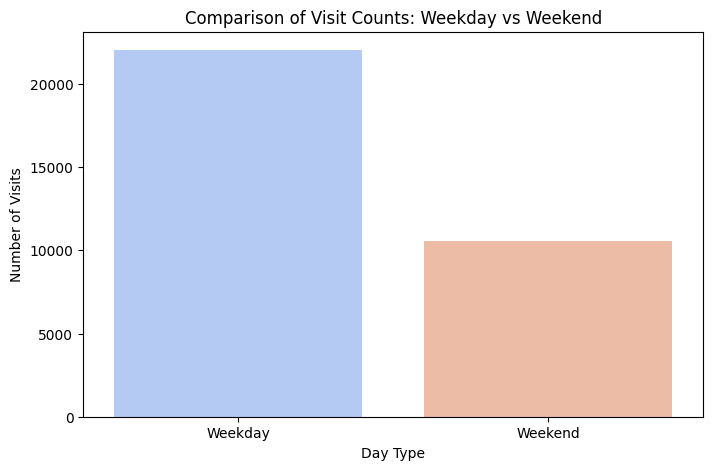

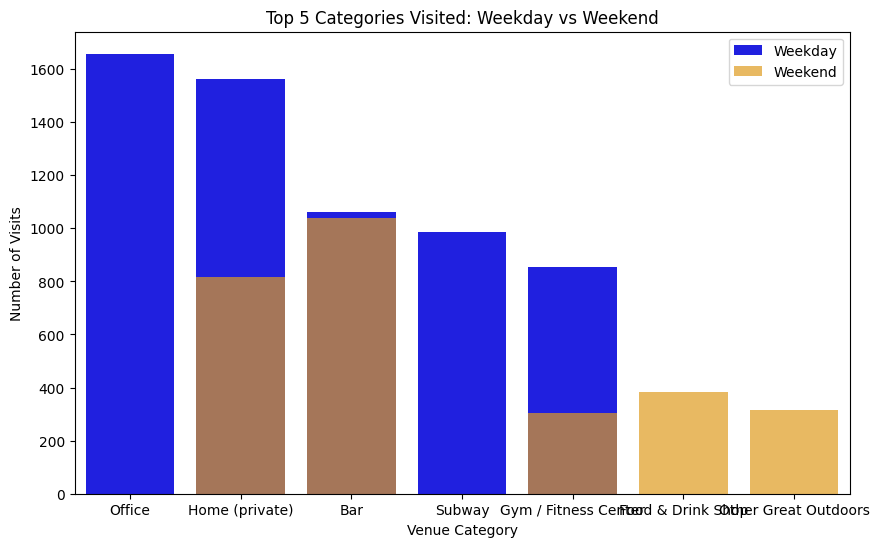

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan weekday dan weekend
df1['day_of_week'] = pd.to_datetime(df1['utcTimestamp']).dt.day_name()
df1['is_weekend'] = df1['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah kunjungan weekday vs weekend
visit_counts = df1.groupby('is_weekend')['venueCategory'].count()

# Visualisasi jumlah kunjungan
plt.figure(figsize=(8, 5))
sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="coolwarm")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Comparison of Visit Counts: Weekday vs Weekend")
plt.ylabel("Number of Visits")
plt.xlabel("Day Type")
plt.show()

# Distribusi kategori tempat antara weekday dan weekend
category_weekday = df1[~df1['is_weekend']]['venueCategory'].value_counts().head(5)
category_weekend = df1[df1['is_weekend']]['venueCategory'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_weekday.index, y=category_weekday.values, color='blue', label='Weekday')
sns.barplot(x=category_weekend.index, y=category_weekend.values, color='orange', alpha=0.7, label='Weekend')
plt.title("Top 5 Categories Visited: Weekday vs Weekend")
plt.ylabel("Number of Visits")
plt.xlabel("Venue Category")
plt.legend()
plt.show()

<ipython-input-8-a03fafb2095e>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['day_of_week'] = pd.to_datetime(df2['utcTimestamp'], errors='coerce').dt.day_name()
<ipython-input-8-a03fafb2095e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="coolwarm")


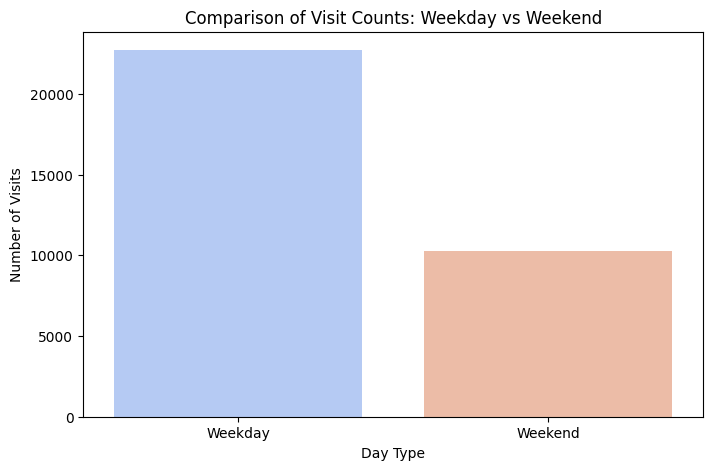

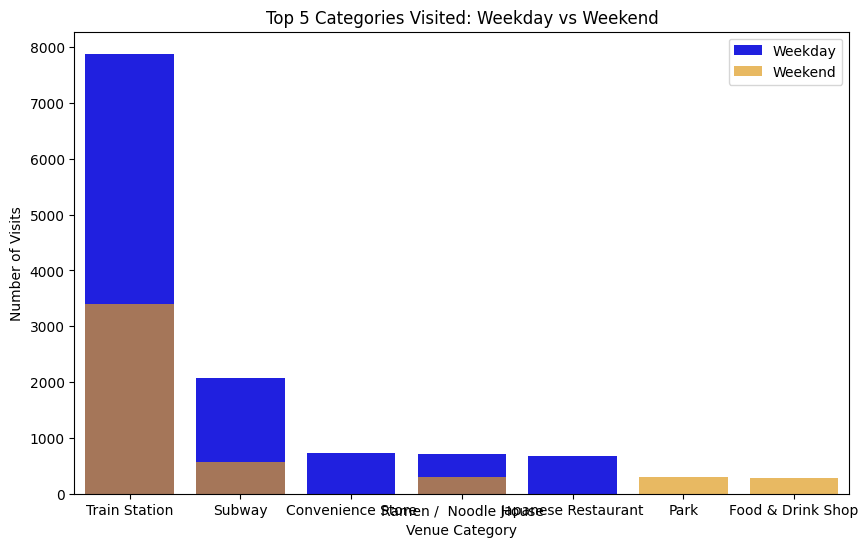

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan weekday dan weekend
df2['day_of_week'] = pd.to_datetime(df2['utcTimestamp'], errors='coerce').dt.day_name()
df2['is_weekend'] = df2['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah kunjungan weekday vs weekend
visit_counts = df2.groupby('is_weekend')['venueCategory'].count()

# Visualisasi jumlah kunjungan
plt.figure(figsize=(8, 5))
sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="coolwarm")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Comparison of Visit Counts: Weekday vs Weekend")
plt.ylabel("Number of Visits")
plt.xlabel("Day Type")
plt.show()

# Distribusi kategori tempat antara weekday dan weekend
category_weekday = df2[~df2['is_weekend']]['venueCategory'].value_counts().head(5)
category_weekend = df2[df2['is_weekend']]['venueCategory'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_weekday.index, y=category_weekday.values, color='blue', label='Weekday')
sns.barplot(x=category_weekend.index, y=category_weekend.values, color='orange', alpha=0.7, label='Weekend')
plt.title("Top 5 Categories Visited: Weekday vs Weekend")
plt.ylabel("Number of Visits")
plt.xlabel("Venue Category")
plt.legend()
plt.show()